In [22]:
import matplotlib.pyplot as plt
import pulp
import math
import random
import numpy as np

# Utilities (Copied from Starter File)

## Points and Distances

In [23]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

## PlotMap

In [24]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=7,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    V, E = G

    if not grid:
        plt.axis('on')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],[ p[1] for p in P ], styleP, lw=lwP, ms=msP)
              
              
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        for w in W:
            plt.plot([w[0]], [w[1]], styleW, ms=msW)
        
                      
    if text is not None:
        minX = min([p[0] for p in V])
        plt.text(minX, 0, text)
    if grid:
        plt.grid()
    plt.show()

## Add Targets

In [25]:
def addTargets(M, T):
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t)+dist(t, Q)-dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove( (P, Q) )
        E.append( (P, t) )
        E.append( (t, Q) )
        V.append(t)
    return V, E

## Generate Warehouse Location

This is a blind random generation as it would be needed for a Monte-Carlo Optimisation.
You may improve this algorithm to reduce the search space.

In [26]:
def generateWarehouseLocations(M, seed=None):
    if seed is not None:
        random.seed(seed)
    V, _ = M
    W = random.sample(V, k=len(V)//10)
    return W

# Load Pickled Sample Data

In [27]:
import pickle
with open('myData.pickled', 'rb') as f:
    M, C = pickle.load(f)

In [28]:
random.seed(9340)
W = generateWarehouseLocations(M,seed=9340)

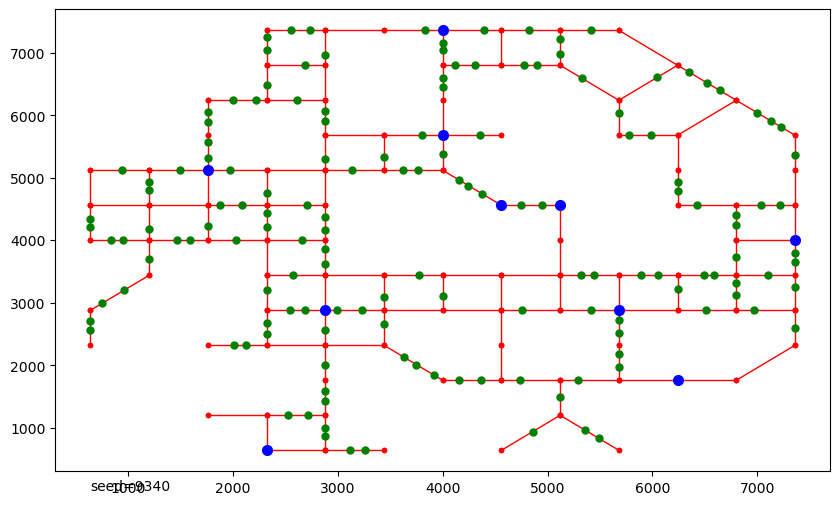

In [29]:
plotMap(M, T=C, P=[], W=W, text="seed=9340")

# Finding the Shortest Past

## The Algorithm

This is the $A^{*}$ algorithm introduced in Week 3.

In [30]:
def pathLength(P):
    return 0 if len(P)<=1 else \
            dist(P[0], P[1])+pathLength(P[1:])

In [31]:
def shortestPath(M, A, B):

    def h(p): 
        return pathLength(p)+dist(p[-1],B)
    
    # candidates C are pairs of the path so far and 
    # the heuristic function of that path, 
    # sorted by the heuristic function, as maintained by
    # insert function
    def insert(C, p):
        hp = h(p)
        c = (p, hp)
        for i in range(len(C)):
            if C[i][1]>hp:
                return C[:i]+[c]+C[i:]
        return C+[c]   
        
    V, E = M
    assert(A in V and B in V)    
    C = insert([], [A])

    while len(C)>0:
        # take the first candidate out of the list of candidates
        path, _ = C[0]
        C = C[1:]
        if path[-1]==B:
            return path
        else:
            for (x, y) in E:
                if path[-1]==x and y not in path:
                    C = insert(C, path+[y])
                elif path[-1]==y and x not in path:
                    C = insert(C, path+[x])
    return None

## Testing

In [32]:
A = C[0]
B = C[-1]

In [33]:
MAB = addTargets(M, [A, B])

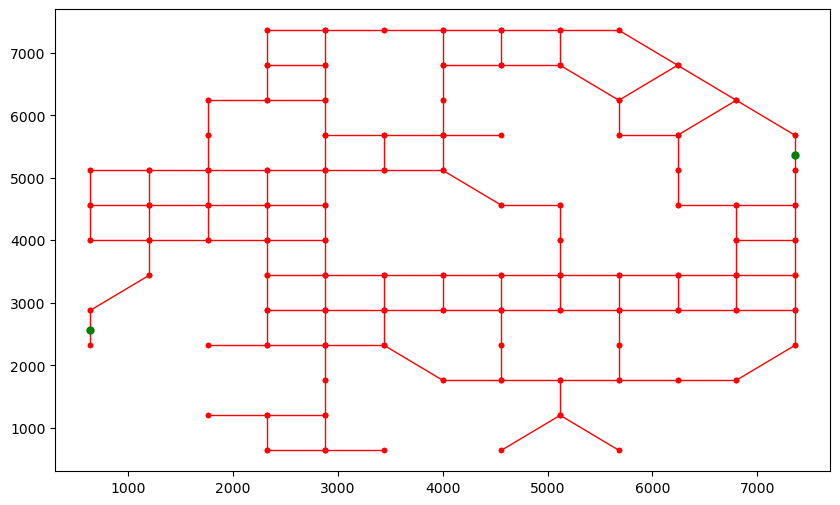

In [34]:
plotMap(MAB, T=[A, B])

In [35]:
P = shortestPath(MAB, A, B)

In [36]:
P

[(640, 2564),
 (640, 2880),
 (1200, 3440),
 (1200, 4000),
 (1760, 4000),
 (2320, 4000),
 (2880, 4000),
 (2880, 3440),
 (3440, 3440),
 (4000, 3440),
 (4560, 3440),
 (5120, 3440),
 (5680, 3440),
 (6240, 3440),
 (6800, 3440),
 (6800, 4000),
 (6800, 4560),
 (7360, 4560),
 (7360, 5120),
 (7360, 5367)]

In [37]:
pathLength(P)

10314

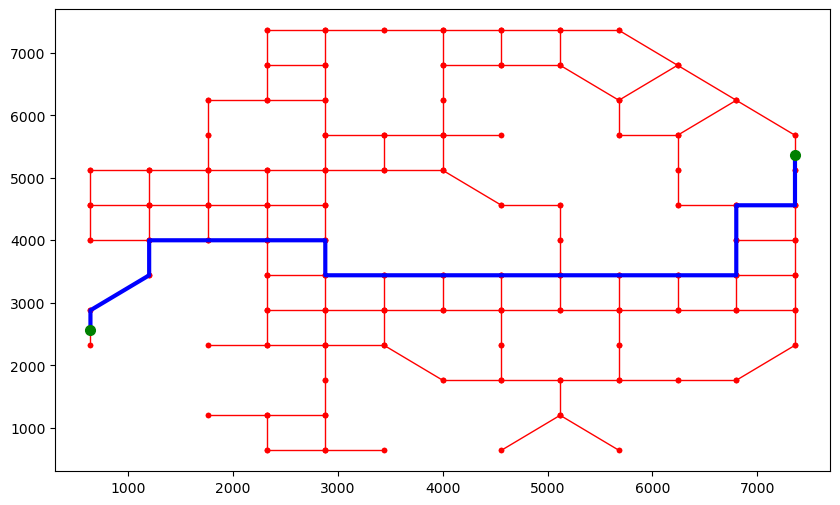

In [38]:
plotMap(MAB, T=[A, B], P=P)

In [39]:
W

[(6240, 1760),
 (1760, 5120),
 (5120, 4560),
 (4000, 5680),
 (2880, 2880),
 (5680, 2880),
 (4000, 7360),
 (4560, 4560),
 (2320, 640),
 (7360, 4000)]

In [40]:
W[0]

(6240, 1760)